In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

BostonTrain = pd.read_csv("boston_train.csv")
BostonTrain.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


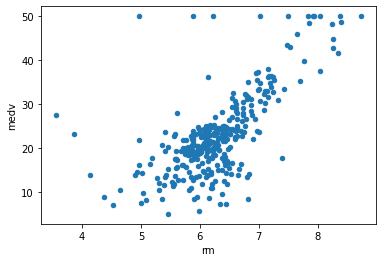

In [5]:
BostonTrain.plot.scatter('rm', 'medv')

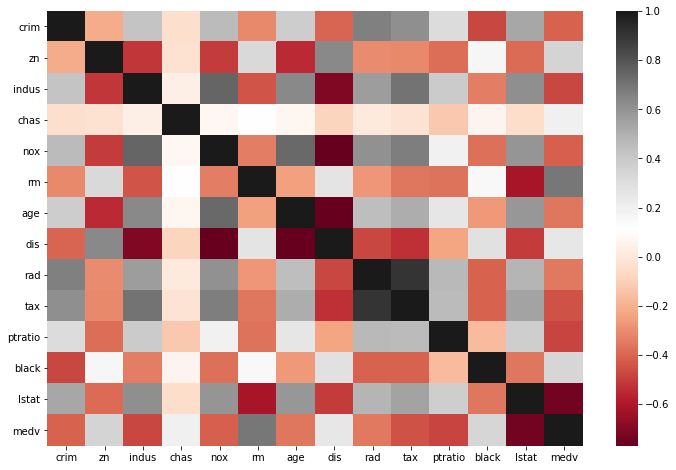

In [6]:
plt.subplots(figsize=(12,8))
sns.heatmap(BostonTrain.corr(), cmap = 'RdGy')

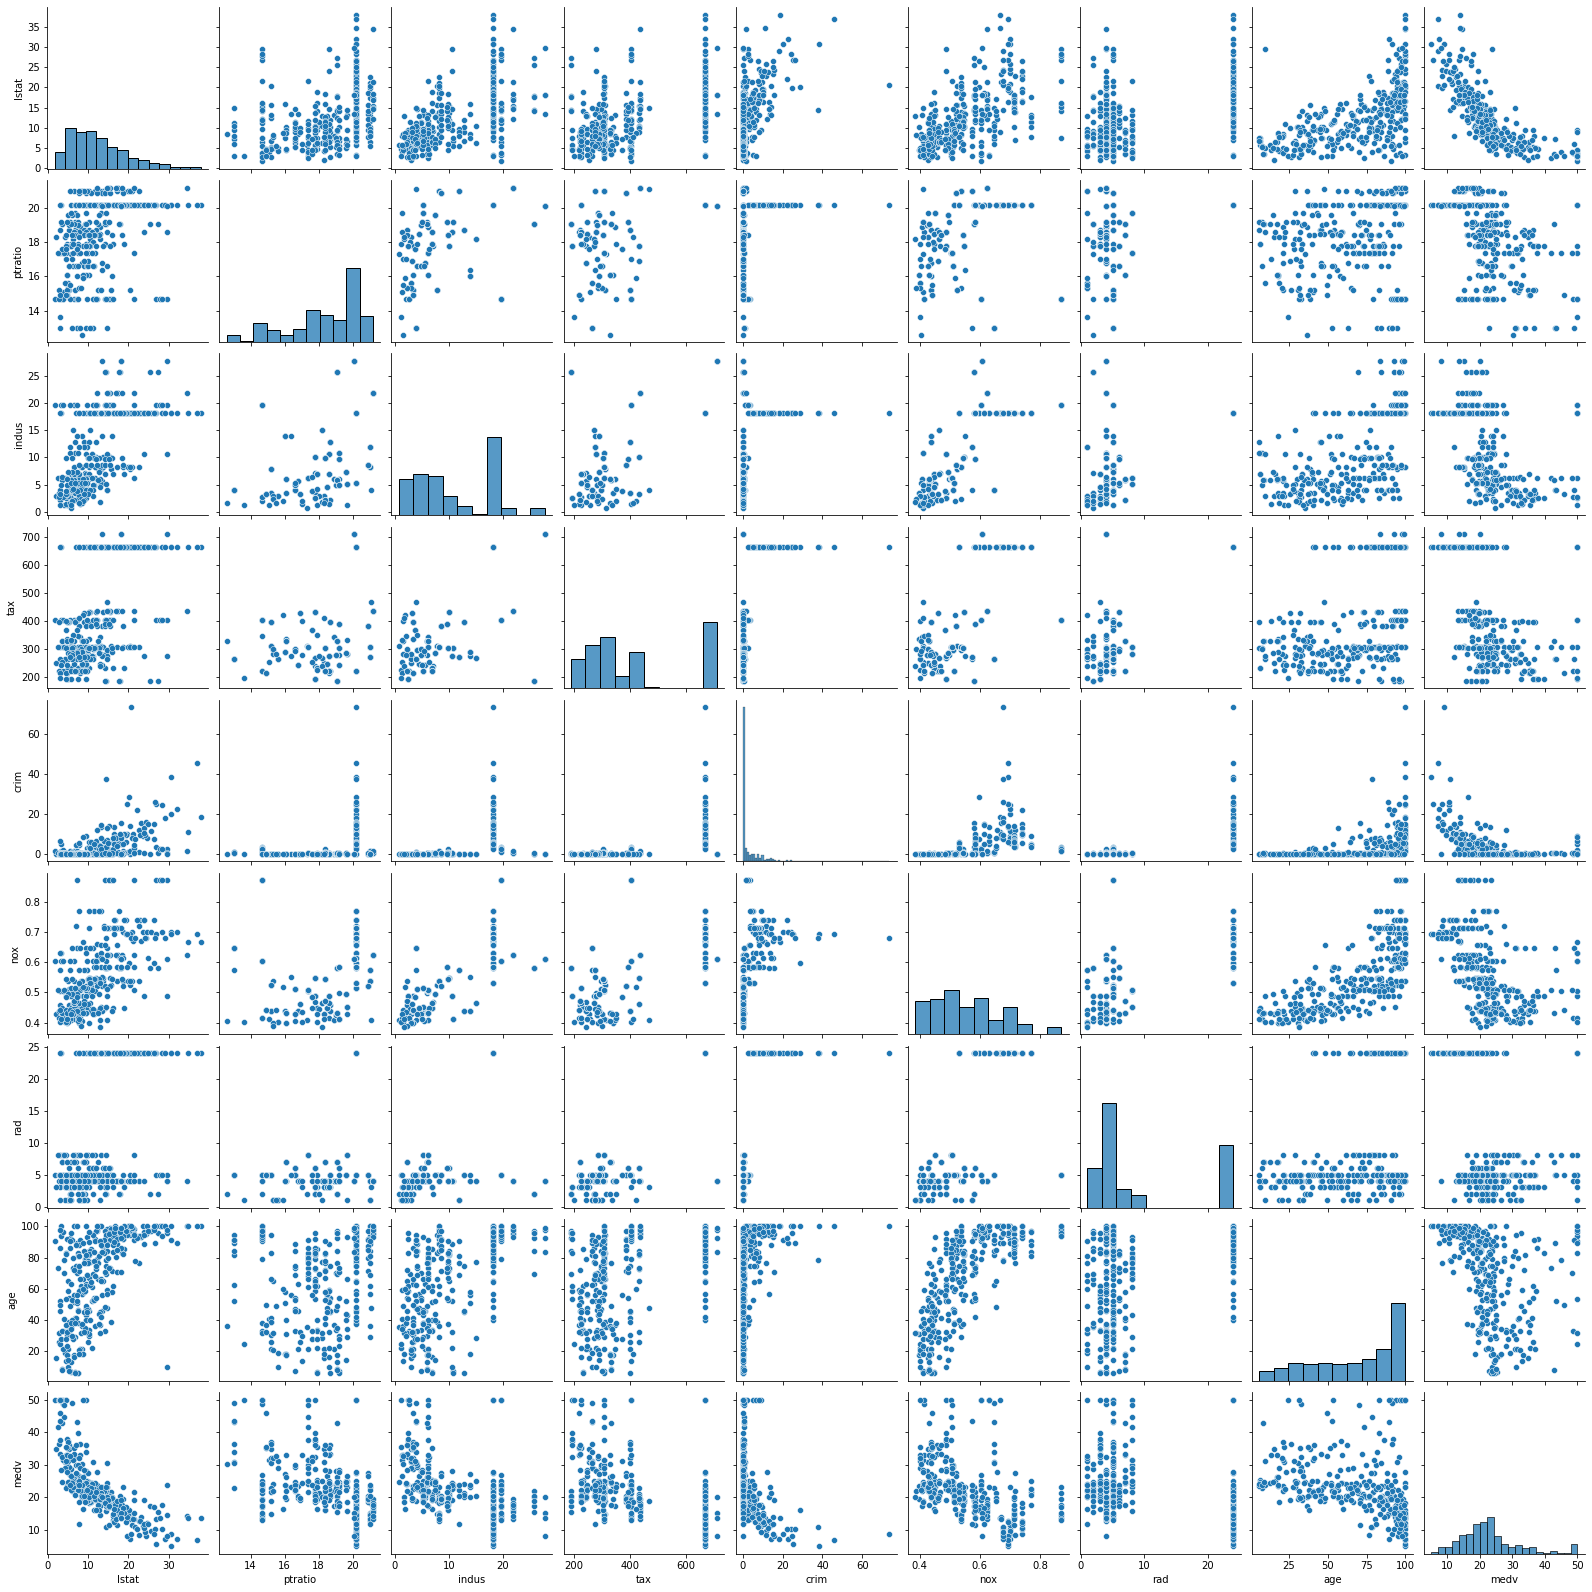

In [7]:
sns.pairplot(BostonTrain, vars = ['lstat', 'ptratio', 'indus', 'tax', 'crim', 'nox', 'rad', 'age', 'medv'])

In [8]:
X = BostonTrain[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y = BostonTrain['medv']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Predicted Y')

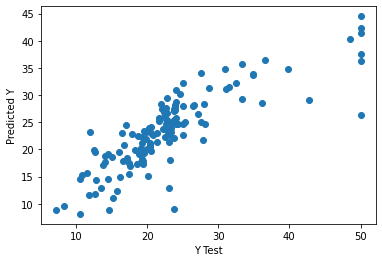

In [10]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [11]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.386501856119893
MSE: 23.378545661740713
RMSE: 4.835136571157087


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


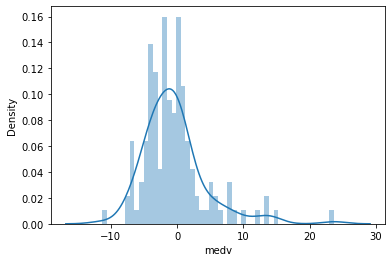

In [12]:
sns.distplot((y_test-predictions),bins=50)

In [13]:
coefficients = pd.DataFrame(lm.coef_,X.columns)
coefficients.columns = ['coefficients']
coefficients

,coefficients
crim,-0.058495
zn,0.036726
indus,-0.089249
chas,4.273116
nox,-12.086823
rm,3.176367
age,0.012430
dis,-1.402007
rad,0.323812
tax,-0.011618
